In [2]:
# Initialize Otter
import otter
grader = otter.Notebook("hw04.ipynb")

# Homework 4: Functions, Tables, and Groups

**Helpful Resource:**
- [Python Reference](http://data8.org/su21/python-reference.html): Cheat sheet of helpful array & table methods used in Data 8!

**Reading**: 
* [Visualizing Numerical Distributions](https://www.inferentialthinking.com/chapters/07/2/Visualizing_Numerical_Distributions.html)
* [Functions and Tables](https://www.inferentialthinking.com/chapters/08/Functions_and_Tables.html)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the provided tests. Each time you start your server, you will need to execute this cell again to load the tests.

For all problems that you must write explanations and sentences for, you **must** provide your answer in the designated space. **Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook!** For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Otherwise, you will fail tests that you thought you were passing previously!

**Deadline:**

This assignment is due Tuesday, 7/6 at 11:59 P.M PST. Late work will not be accepted as per the [policies](http://data8.org/su21/policies.html) page.


### **Note: This homework has hidden tests on it. That means even though tests may say 100% passed, doesn't mean your final grade will be 100%. We will be running more tests for correctness once everyone turns in the homework.**


Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the policies page to learn more about how to learn cooperatively.

You should start early so that you have time to get help if you're stuck. Office hours are held Monday-Friday. The schedule appears on [http://data8.org/su21/office-hours.html](http://data8.org/sp21/office-hours.html).

In [3]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.\n",
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## 1. Burrito-ful San Diego

In [4]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

Tam, Margaret, and Winifred are trying to use Data Science to find the best burritos in San Diego! Their friends Irene and Maya provided them with two comprehensive datasets on many burrito establishments in the San Diego area taken from (and cleaned from): https://www.kaggle.com/srcole/burritos-in-san-diego/data

The following cell reads in a table called `ratings` which contains names of burrito restaurants, their Yelp rating, Google rating, as well as their Overall rating. The Overall rating is not an average of the Yelp and Google ratings, but rather it is the overall rating of the cutomers that were surveyed in the study above.


It also reads in a table called `burritos_types` which contains names of burrito restaurants, their menu items, and the cost of the respective menu item at the restaurant.

In [5]:
#Just run this cell
ratings = Table.read_table("ratings.csv")
ratings.show(5)
burritos_types = Table.read_table("burritos_types.csv")
burritos_types.show(5)

Name,Yelp,Google,Overall
Albertacos,3.5,3.9,3.45
Burrito Factory,4.5,4.8,3.5
Burros and Fries,3.5,4.1,3.575
Caliente Mexican Food,3.5,4.4,3.25
California Burrito Company,3.5,4.4,3.2


Name,Menu_Item,Cost
Albertacos,California,5.7
Albertacos,Carne asada,5.25
"Alberto's 623 N Escondido Blvd, Escondido, CA 92025",Carne Asada,4.59
Burrito Box,Steak with guacamole,11.5
Burrito Factory,Steak everything,7.35


**Question 1.** It would be easier if we could combine the information in both tables. Assign `burritos` to the result of joining the two tables together, so that we have a table with the ratings for every corresponding menu item from every restaurant. Each menu item has the same rating as the restaurant from which it is from. **(6 Points)**

*Note: it doesn't matter which table you put in as the argument to the table method, either order will work for the autograder tests.*

*Hint: If you need help on using the join method, look at the [python reference](http://data8.org/su21/python-reference.html) or [Section 8.4](https://www.inferentialthinking.com/chapters/08/4/Joining_Tables_by_Columns.html) in the textbook. This will be covered in Monday's lecture.*

<!--
BEGIN QUESTION
name: q1_1
points:
 - 0
 - 0
 - 6
-->

In [6]:
burritos = ratings.join("Name",burritos_types)
burritos.show(5)

Name,Yelp,Google,Overall,Menu_Item,Cost
Albertacos,3.5,3.9,3.45,California,5.7
Albertacos,3.5,3.9,3.45,Carne asada,5.25
Burrito Factory,4.5,4.8,3.5,Steak everything,7.35
Burros and Fries,3.5,4.1,3.575,California,7.19
Burros and Fries,3.5,4.1,3.575,Carne asada,6.89


In [7]:
grader.check("q1_1")

q1_1 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 2.** Let's look at how the Yelp scores compare to the Google scores in the `burritos` table. First, assign `yelp_and_google` to a table only containing the columns `Yelp` and `Google`. Then, make a scatter plot with Yelp scores on the x-axis and the Google scores on the y-axis. **(6 Points)**

<!--
BEGIN QUESTION
name: q1_2
manual: True
-->

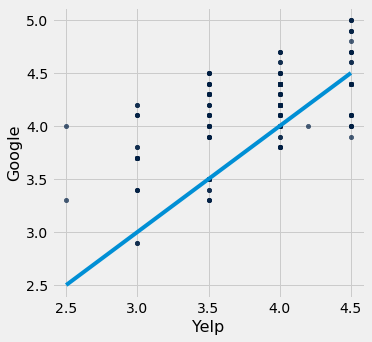

In [8]:
yelp_and_google = burritos.select("Yelp","Google")
yelp_and_google.scatter("Yelp","Google")
# Don't change/edit/remove the following line.
# To help you make conclusions, we have plotted a straight line on the graph (y=x)
plt.plot(np.arange(2.5,5,.5), np.arange(2.5,5,.5));

In [9]:
grader.check("q1_2")

q1_2 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 3.** Looking at the scatter plot you just made in Question 1.2, do you notice any pattern(s) (i.e. is one of the two types of scores consistently higher than the other one)? If so, describe them **briefly** in the cell below. **(8 Points)**

<!--
BEGIN QUESTION
name: q1_3
manual: True
-->

Yes. In majority of all cases, Google scores are generally higher than the Yelp score. The reason is that a large amount of scattered dots are distributed above the line y=x, which means that y>x.

<!-- END QUESTION -->



Here's a refresher on how `.group` works! You can read how `.group` works in the [textbook](https://www.inferentialthinking.com/chapters/08/2/Classifying_by_One_Variable.html), or you can view the video below. The video resource was made by a past staff member - Divyesh Chotai! 

You can also use the [Table Functions Visualizer](http://data8.org/interactive_table_functions/) to get some more hands-on experience with the `.group` function!

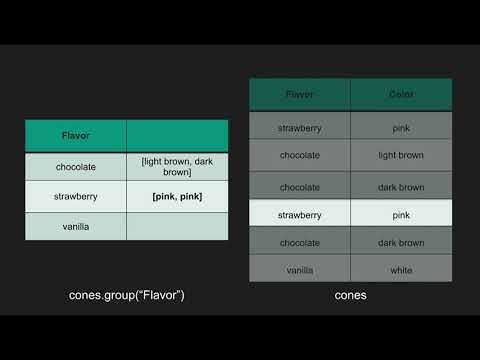

In [10]:
from IPython.display import YouTubeVideo
YouTubeVideo("HLoYTCUP0fc")

**Question 4.** There are so many types of California burritos in the `burritos` table! Winifred wants to know which type is the highest rated across all restaurants.

Create a table that has two columns: the name of the burrito and the average overall rating of that burrito across restaurants. **In your calculations, you should compare burritos that contain the word "California".** For example, there's "California" burritos, "California breakfast" burritos, "California Surf and Turf" burritos, etc. **(10 Points)**

*Tip: If multiple restaurants serve the "California - Chicken" burrito, what table method can we use to aggregate those together and find the average overall rating?* 

*Note: you can break up the solution into multiple lines, as long as you assign the final output table to `california_burritos`! For reference however, the staff solution only used one line.*

<!--
BEGIN QUESTION
name: q1_4
points:
 - 1
 - 1
 - 8
-->

In [18]:
with_california_burritos = burritos.where("Menu_Item",are.containing("California"))
california_burritos = with_california_burritos.group(make_array("Menu_Item"),np.average).select("Menu_Item","Overall average")
california_burritos

Menu_Item,Overall average
California,3.5242
California (only cheese),4.1
California + Guac + sour cream,3.4
California - Chicken,3.45839
California - Pork Adobada,3.26429
California - Steak,3.26429
California Chipotle,4.36667
California Everything,4.1
California Everything mini,4.1
California Surf,3.66667


In [19]:
grader.check("q1_4")

q1_4 results: All test cases passed!

**Question 5.** Given this new table `california_burritos`, Winifred can figure out the name of the California burrito with the highest overall average rating! Assign `best_california_burrito` to a line of code that outputs the string that represents the name of the California burrito with the highest overall average rating. If multiple burritos satisfy this criteria, you can output any one of them. **(8 Points)**

<!--
BEGIN QUESTION
name: q1_5
points:
 - 0
 - 8
-->

In [20]:
best_california_burrito = california_burritos.sort("Overall average",descending=True).column("Menu_Item").item(0)
best_california_burrito

'California Chipotle'

In [21]:
grader.check("q1_5")

q1_5 results: All test cases passed!

**Question 6.** Using the `burritos` table, assign `menu_average` to a table that has three columns that uniquely pairs the name of the restaurant, the menu item featured in the review, and the average Overall score for that menu item at that restaurant. **(11 Points)**

*Hint: Use .group, and remember that you can group by multiple columns. Here's an example from the [textbook](https://www.inferentialthinking.com/chapters/08/3/Cross-Classifying_by_More_than_One_Variable.html)*.

<!--
BEGIN QUESTION
name: q1_6
points:
 - 0
 - 11
-->

In [23]:
menu_average = burritos.group(make_array("Name","Menu_Item"),np.average).select("Name","Menu_Item","Overall average")
menu_average

Name,Menu_Item,Overall average
Albertacos,California,3.45
Albertacos,Carne asada,3.45
Burrito Factory,Steak everything,3.5
Burros and Fries,California,3.575
Burros and Fries,Carne asada,3.575
Burros and Fries,Shrimp California,3.575
Caliente Mexican Food,California,3.25
Caliente Mexican Food,carne asada,3.25
Caliente Mexican Food,fried fish,3.25
California Burrito Company,California,3.2


In [24]:
grader.check("q1_6")

q1_6 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 7.** Tam thinks that burritos in San Diego are cheaper (and taste better) than the burritos in Berkeley. Plot a histogram that visualizes that distribution of the costs of the burritos from San Diego in the `burritos` table. Also use the provided `bins` variable when making your histogram, so that visually, the histogram is more informative. **(3 Points)**

<!--
BEGIN QUESTION
name: q1_7
manual: True
-->

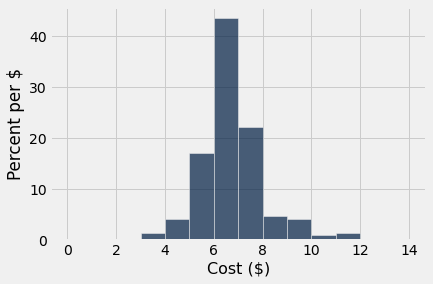

In [25]:
bins = np.arange(0, 15, 1)
# Please also use the provided bins
burritos.hist("Cost",unit="$",bins=bins)

<!-- END QUESTION -->

**Question 8.** What percentage of burritos in San Diego are less than $6? Assign `burritos_less_than_6` to your answer, which should be between 0 and 100. You should only use the histogram above to answer the question. Do not use code to find the answer, just eyeball the heights and use arithmetic! **(3 Points)**

Your answer does not have to be exact, but it should be within a couple percentages of the staff answer.

<!--
BEGIN QUESTION
name: q1_8
manual: False
points:
 - 0
 - 3
-->

In [26]:
burritos_less_than_6 = 22

In [27]:
grader.check("q1_8")

q1_8 results: All test cases passed!

## 2. Faculty Salaries

In [28]:
# Run this cell to set up the notebook, but please don't change it.

import numpy as np
from datascience import *

This exercise is designed to give you practice using the Table methods `pivot` and `group`. [Here](http://data8.org/su21/python-reference.html) is a link to the Python reference page in case you need a quick refresher. The [table function visualizer](http://data8.org/interactive_table_functions/) is also a helpful tool.

Run the cell below to view a demo on how you can use pivot on a table. (Thank you to past staff Divyesh Chotai)

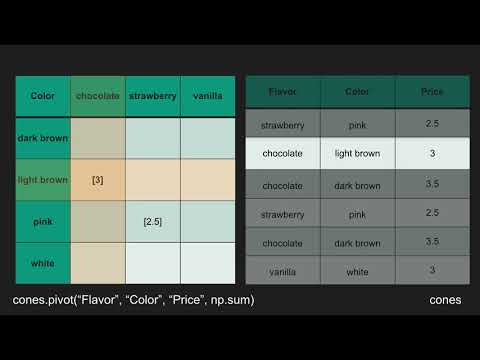

In [29]:
from IPython.display import YouTubeVideo
YouTubeVideo("4WzXo8eKLAg")

In the next cell, we load a dataset created by the [Daily Cal](http://projects.dailycal.org/paychecker/) which contains Berkeley faculty, their departments, their positions, and their gross salaries in 2015.

In [30]:
raw_profs = Table.read_table("faculty.csv").where("year", are.equal_to(2015)).drop("year", "title")
profs = raw_profs.relabeled("title_category", "position")
profs

name,department,position,gross_salary
CYNTHIA ABAN,South & Southeast Asian Studies,lecturer,64450
PIETER ABBEEL,Computer Science,associate professor,184998
SALLY ABEL,Law,lecturer,3466
ELIZABETH ABEL,English,professor,138775
DOR ABRAHAMSON,Education,associate professor,100300
KATHRYN ABRAMS,Law,professor,319693
BARBARA ABRAMS,Public Health,professor,191162
SARAH ACCOMAZZO,Social Welfare,lecturer,14779
CHARISMA ACEY,City and Regional Planning,assistant professor,101567
DAVID ACKERLY,Biology,professor,182288


We want to use this table to generate arrays with the names of each professor in each department.

**Question 1.** Set `prof_names` to a table with two columns. The first column should be called `department` and have the name of every department once, and the second column should be called `faculty` with each row in that second column containing an *array* of the names of all faculty members in that department. **(8 Points)**

*Hint:* Think about how ```group``` works: it collects values into an array and then applies a function to that array. We have defined two functions below for you, and you will need to use one of them in your call to ```group```.

<!--
BEGIN QUESTION
name: q2_1
points:
 - 0
 - 0
 - 0
 - 0
 - 4
 - 4
-->

In [79]:
# Pick one of the two functions defined below in your call to group.
def function1(array):
    '''Returns the first item'''
    return array.item(0)

def function2(array):
    '''Returns the array that is passed through'''
    return array 

# Make a call to group using one of the functions above when you define prof_names
prof_names = profs.group(make_array("department"),function2).select("department","name function2").relabel("name function2","faculty")
prof_names

department,faculty
African American Studies,['AYA DE LEON' 'CHIYUMA ELLIOTT' 'NIKKI JONES' 'DAVID KY ...
Agricultural and Resource Economics and Policy,['MAXIMILIAN AUFFHAMMER' 'CHARLES GIBBONS' 'JEFFREY PERL ...
Anthroplogy,['SABRINA AGARWAL' 'STANLEY BRANDES' 'CHARLES BRIGGS' ' ...
Architecture,['MARK ANDERSON' 'JACOB ATHERTON' 'WILLIAM ATWOOD' 'R.GA ...
Art History,['DILIANA ANGELOVA' 'PATRICIA BERGER' 'JULIA BRYAN-WILSO ...
Art Practice,['ALLAN DESOUZA' 'AIDA GAMEZ' 'RANDY HUSSONG' 'JENNIFER ...
Astronomy,['GIBOR BASRI' 'STEVEN BECKWITH' 'LEO BLITZ' 'EUGENE CHI ...
Bioengineering,['ADAM ARKIN' 'IRINA CONBOY' 'STEVEN CONOLLY' 'JOHN DUEB ...
Biology,['DAVID ACKERLY' 'HILLEL ADESNIK' 'KELLY AGNEW' 'DORIS B ...
Buddhist Studies,['JANN RONIS']


In [80]:
grader.check("q2_1")

q2_1 results: All test cases passed!

#### Understanding the code you just wrote in 2.1 is important for moving forward with the class! If you made a lucky guess, take some time to look at the code, step by step.

<!-- BEGIN QUESTION -->

**Question 2.** At the moment, the ```name``` column of the `profs` table is sorted by last name. Would the arrays you generated in the `faculty` column of the previous part be the same if we had sorted by first name instead before generating them? Two arrays are the **same** if they contain the same number of elements and the elements located at corresponding indexes in the two arrays are identical. An example of arrays that are NOT the same: `array([1,2]) != array([2,1])`. Explain your answer.  **(8 Points)**

<!--
BEGIN QUESTION
name: q2_2
manual: true
-->

No. Despite that we have same elements in every array in the faculty column, because sequence of names sorted by first names and last names are generally different, and group takes elements in an up-to-down order, which means order of names added to array are different, so the arrays are not the same. 

<!-- END QUESTION -->

**Question 3.** Set `department_ranges` to a table containing departments as the rows, and the position as the columns. The values in the rows should correspond to a salary range, where range is defined as the **difference between the highest salary and the lowest salary in the department for that position**. **(8 Points)**

*Hint 1: First you'll need to define a new function `salary_range` which takes in an array of salaries and returns the range of salaries in that array.*

*Hint 2: What table function allows you to specify the rows and columns of a new table? You probably watched a video on it earlier in the homework!*

<!--
BEGIN QUESTION
name: q2_3
manual: false
points:
 - 0
 - 0
 - 1
 - 7
-->

In [92]:
# Define salary_range first
def salary_range(array):
    '''Returns the first item'''
    return max(array)-min(array)


department_ranges = profs.pivot("position","department","gross_salary",salary_range)
department_ranges

department,assistant professor,associate professor,lecturer,professor
African American Studies,128828,48814,83309,0
Agricultural and Resource Economics and Policy,0,0,0,29650
Anthroplogy,11193,103271,11131,166527
Architecture,47675,103204,72977,167892
Art History,57288,27439,31861,100894
Art Practice,0,26632,93923,0
Astronomy,0,0,0,138346
Bioengineering,5513,2794,69008,134739
Biology,209667,113341,137087,288554
Buddhist Studies,0,0,0,0


In [93]:
grader.check("q2_3")

q2_3 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 4.** Give an explanation as to why some of the row values are `0` in the `department_ranges` table from the previous question. **(8 Points)**

<!--
BEGIN QUESTION
name: q2_4
manual: True
-->

There are 2 possible cases for this phenomenon:(1)there are not any or just one faculty member of that position in a department;(2) it is possible that all members with same position in faculty have the same gross salary.  

<!-- END QUESTION -->

**Question 5.** Create a new table called `department_and_counts` with a column called `department` and a column called `count` for the number of positions within that department that have an average salary above $100,000. If the department doesn't have any positions with an average salary above 100k, then it should not have a row in the final table. **(13 Points)**

*Hint 1: Use pen and paper to draw out the intermediate tables to answer this question. This question is difficult! The variable names provided are meant to help guide the intermediate steps and general thought process.*

*Hint 2: Remember that you can group by multiple columns. Here's an example from the [textbook](https://www.inferentialthinking.com/chapters/08/3/Cross-Classifying_by_More_than_One_Variable.html).*

<!--
BEGIN QUESTION
name: q2_5
manual: False
points:
 - 2
 - 2
 - 9
-->

In [102]:
no_names = profs.drop("name")
salaries_by_department_position = no_names.group(make_array("department","position"),np.average)
positions_above_100k = salaries_by_department_position.where("gross_salary average",are.above(100000))
department_and_counts = positions_above_100k.group("department")
department_and_counts

department,count
African American Studies,2
Agricultural and Resource Economics and Policy,1
Anthroplogy,2
Architecture,3
Art History,2
Art Practice,3
Astronomy,3
Bioengineering,4
Biology,3
Business,3


In [ ]:
grader.check("q2_5")

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)